In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

In [2]:
import pandas as pd 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv('/gdrive/MyDrive/training_data_outliers_removed.csv')
df['average_delay'] = df['carrier_delay'] + df['nas_delay'] + df['late_aircraft_delay']
X = df[['crs_arr_time','actual_elapsed_time','distance','year','month','day','weekday','average_delay']]
y = df['arr_delay']
reg = RandomForestRegressor(n_estimators=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
reg.fit(X_train,y_train)

y_pred=reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

14.288903426102456

In [43]:
df = pd.read_csv('/gdrive/MyDrive/training_data_outliers_removed.csv')

In [39]:
import sklearn.preprocessing
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [45]:
df['sumDelays'] = df['carrier_delay'] + df['weather_delay'] + df['nas_delay']+ df['security_delay']+ df['late_aircraft_delay']

In [46]:
df['dep_time'] = df['dep_time'].astype(float).astype(int).apply(lambda x: '{0:0>4}'.format(x)).astype(str)

In [47]:
df

,fl_date,mkt_unique_carrier,op_unique_carrier,origin,dep_time,dep_delay,dest,arr_time,arr_delay,crs_arr_time,actual_elapsed_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,month,day,weekday,sumDelays
0,2018-08-26,AS,AS,PDX,1717,-3.0,LAX,1936.0,-5.0,1941,139.0,834.0,0.0,0.0,0.0,0.0,0.0,2018,8,26,1.0,0.0
1,2018-05-24,UA,OO,DEN,1750,0.0,PSP,1913.0,3.0,1910,143.0,776.0,0.0,0.0,0.0,0.0,0.0,2018,5,24,0.0,0.0
2,2019-01-10,AA,PT,CLT,1105,-4.0,ROA,1200.0,-16.0,1216,55.0,155.0,0.0,0.0,0.0,0.0,0.0,2019,1,10,0.0,0.0
3,2018-07-09,WN,WN,ELP,0554,-1.0,LAS,623.0,-12.0,635,89.0,583.0,0.0,0.0,0.0,0.0,0.0,2018,7,9,0.0,0.0
4,2019-07-09,DL,9E,LGA,1629,0.0,BNA,1759.0,-12.0,1811,150.0,764.0,0.0,0.0,0.0,0.0,0.0,2019,7,9,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978871,2018-08-29,AA,AA,DCA,1223,-7.0,BOS,1343.0,-17.0,1400,80.0,399.0,0.0,0.0,0.0,0.0,0.0,2018,8,29,0.0,0.0
978872,2018-02-11,UA,OO,DCA,2043,3.0,ORD,2144.0,-15.0,2159,121.0,612.0,0.0,0.0,0.0,0.0,0.0,2018,2,11,1.0,0.0
978873,2018-10-29,WN,WN,SFO,1926,-9.0,SAN,2054.0,-16.0,2110,88.0,447.0,0.0,0.0,0.0,0.0,0.0,2018,10,29,0.0,0.0
978874,2019-03-28,UA,UA,EWR,1658,-5.0,MCO,1945.0,-8.0,1953,167.0,937.0,0.0,0.0,0.0,0.0,0.0,2019,3,28,0.0,0.0


In [48]:
df['dep_hour'] = df['dep_time'].astype(str).str[:2].astype(int)

In [49]:
df['Weekday'] = pd.to_datetime(df['fl_date']).dt.dayofweek

In [50]:
df['Season']= (pd.to_datetime(df['fl_date']).dt.month - 1) // 3

In [51]:
df

,fl_date,mkt_unique_carrier,op_unique_carrier,origin,dep_time,dep_delay,dest,arr_time,arr_delay,crs_arr_time,actual_elapsed_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,month,day,weekday,sumDelays,dep_hour,Weekday,Season
0,2018-08-26,AS,AS,PDX,1717,-3.0,LAX,1936.0,-5.0,1941,139.0,834.0,0.0,0.0,0.0,0.0,0.0,2018,8,26,1.0,0.0,17,6,2
1,2018-05-24,UA,OO,DEN,1750,0.0,PSP,1913.0,3.0,1910,143.0,776.0,0.0,0.0,0.0,0.0,0.0,2018,5,24,0.0,0.0,17,3,1
2,2019-01-10,AA,PT,CLT,1105,-4.0,ROA,1200.0,-16.0,1216,55.0,155.0,0.0,0.0,0.0,0.0,0.0,2019,1,10,0.0,0.0,11,3,0
3,2018-07-09,WN,WN,ELP,0554,-1.0,LAS,623.0,-12.0,635,89.0,583.0,0.0,0.0,0.0,0.0,0.0,2018,7,9,0.0,0.0,5,0,2
4,2019-07-09,DL,9E,LGA,1629,0.0,BNA,1759.0,-12.0,1811,150.0,764.0,0.0,0.0,0.0,0.0,0.0,2019,7,9,0.0,0.0,16,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978871,2018-08-29,AA,AA,DCA,1223,-7.0,BOS,1343.0,-17.0,1400,80.0,399.0,0.0,0.0,0.0,0.0,0.0,2018,8,29,0.0,0.0,12,2,2
978872,2018-02-11,UA,OO,DCA,2043,3.0,ORD,2144.0,-15.0,2159,121.0,612.0,0.0,0.0,0.0,0.0,0.0,2018,2,11,1.0,0.0,20,6,0
978873,2018-10-29,WN,WN,SFO,1926,-9.0,SAN,2054.0,-16.0,2110,88.0,447.0,0.0,0.0,0.0,0.0,0.0,2018,10,29,0.0,0.0,19,0,3
978874,2019-03-28,UA,UA,EWR,1658,-5.0,MCO,1945.0,-8.0,1953,167.0,937.0,0.0,0.0,0.0,0.0,0.0,2019,3,28,0.0,0.0,16,3,0


In [52]:
df['mean_origin_weekday'] = df.groupby(['origin','dest','year','Season','Weekday','op_unique_carrier','dep_hour'])['sumDelays'].transform('mean')

In [53]:
df = df.drop(['fl_date','mkt_unique_carrier','carrier_delay','dep_delay',	'weather_delay', 	'nas_delay', 	'security_delay', 'late_aircraft_delay'],axis=1)

In [54]:
df = df.drop('day',axis=1)

In [55]:
df = df.drop(['dep_time','arr_time','crs_arr_time','weekday'],axis=1)

In [56]:
testDF = df.drop('distance',axis=1)

In [57]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
testDF['op_unique_carrier']= le.fit_transform(testDF['op_unique_carrier'])

In [58]:
testDF['origin']= le.fit_transform(testDF['origin'])

In [59]:
testDF['dest']= le.fit_transform(testDF['dest'])

In [60]:
testDF

,op_unique_carrier,origin,dest,arr_delay,actual_elapsed_time,year,month,sumDelays,dep_hour,Weekday,Season,mean_origin_weekday
0,2,242,178,-5.0,139.0,2018,8,0.0,17,6,2,0.0
1,16,86,257,3.0,143.0,2018,5,0.0,17,3,1,0.0
2,17,66,272,-16.0,55.0,2019,1,0.0,11,3,0,0.0
3,21,102,176,-12.0,89.0,2018,7,0.0,5,0,2,0.0
4,0,187,41,-12.0,150.0,2019,7,0.0,16,1,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
978871,1,85,43,-17.0,80.0,2018,8,0.0,12,2,2,0.0
978872,16,85,234,-15.0,121.0,2018,2,0.0,20,6,0,0.0
978873,21,290,278,-16.0,88.0,2018,10,0.0,19,0,3,0.0
978874,19,108,199,-8.0,167.0,2019,3,0.0,16,3,0,0.0


In [61]:
X,y = testDF.drop('arr_delay',axis=1),testDF['arr_delay']

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=12)

In [64]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [65]:
pca = PCA()
scaler = StandardScaler()
X=scaler.fit_transform(X)
pca.fit_transform(X)

array([[-0.53077513,  0.42171853, -0.92006668, ...,  0.94761313,
         0.01254367, -0.01918388],
       [ 0.01517888, -0.73232432,  0.14920951, ..., -0.24744992,
         0.01072173,  0.00844161],
       [ 0.37372621, -2.16492361,  1.00141022, ...,  0.59626494,
         0.01373925, -0.18470888],
       ...,
       [-0.89524158,  1.38359036,  0.55200386, ...,  0.59839735,
         0.01819908, -0.21879062],
       [ 0.44210427, -1.69363439,  0.23611917, ..., -0.84355209,
         0.00681995,  0.23130827],
       [ 0.01373003, -0.72008782,  1.23039568, ..., -0.51861804,
         0.01443855,  0.00844501]])

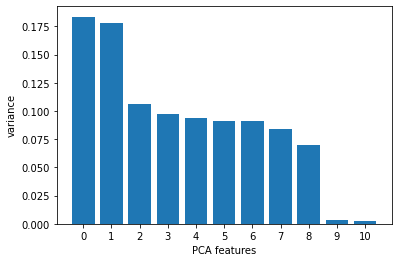

In [66]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.xlabel("PCA features")
plt.ylabel("variance")
plt.show()

In [67]:
pca = PCA(n_components=8)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [68]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score 
from sklearn.model_selection import GridSearchCV
import xgboost as xg

In [69]:
model = RandomForestRegressor(n_estimators=100,random_state=1)
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [70]:
y_pred = model.predict(X_test)

In [71]:
model.score(X_test,y_test)

0.958884690405363

In [72]:
from sklearn.metrics import mean_squared_error

In [73]:
print('mean_squared_error:', mean_squared_error(y_test,y_pred))
print('RSME:',np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2 score:', r2_score(y_test,y_pred))
print('Adjusted R2 value:', 1 - (1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

mean_squared_error: 82.18962016559652
RSME: 9.06584911442919
r2 score: 0.9588846904053628
Adjusted R2 value: 0.9588842103702249


In [74]:
model = GradientBoostingRegressor(n_estimators=150,learning_rate=1,random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('mean_squared_error:', mean_squared_error(y_test,y_pred))
print('r2 score:', r2_score(y_test,y_pred))
print('Adjusted R2 value:', 1 - (1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

mean_squared_error: 100.32477085099485
r2 score: 0.9498125918426339
Adjusted R2 value: 0.9498120058876784
